### Importy

In [1]:
import os
os.chdir('d:/Projekty/LBN-INZ/CODE/model_training/')
print(os.getcwd())

d:\Projekty\LBN-INZ\CODE\model_training


In [2]:
import pandas as pd
import numpy as np
from scripts.essentials import *
from scripts.plots import *
import pickle

In [3]:
cols_news = ['future', 'influential', 'trustworthy', 'not clickbait',
       'finbert_Score', 'bart_Score', 'vader_Score', 'future_finbert',
       'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader',
       'mean_future','mean_influential', 'mean_trustworthy', 'mean_clickbait' 
         ]

### Połączenie News + FE

In [4]:
prefix = "TSLA"
df_news_path = "TSLA_full_agg_8.csv"

In [5]:
df_news = pd.read_csv("csv/"+prefix+"/"+df_news_path)
df_finance = pd.read_csv("csv/finance_all.csv")

połączenie z newsami + uzupełnienie braków

In [6]:
df_m = create_merged_df(df_finance, df_news, prefix)

dorobienie ramki bez weekendu

In [7]:
df_with_weekends = df_m.copy()
df_without_weekends = df_m.copy()

df_without_weekends = apply_weighted_weekend_news(df_without_weekends,'Date', cols_news, weights=[0.6,0.2,0.2])

wyliczenie cech

In [8]:
df_without_weekends = calculate_technical_indicators(df_without_weekends,'Date',prefix+'_Open',prefix+ '_High',prefix+ '_Low',
    prefix+'_Close',prefix+ '_Volume','^GSPC_Close')
df_with_weekends = calculate_technical_indicators(df_with_weekends,'Date',prefix+'_Open',prefix+ '_High',prefix+ '_Low',
    prefix+'_Close',prefix+ '_Volume','^GSPC_Close',True)

In [9]:
df_without_weekends.describe()

,future,influential,trustworthy,not clickbait,finbert_Score,bart_Score,vader_Score,future_finbert,future_bart,future_vader,...,log_return_gspc_5,log_return_gspc_10,log_return_gspc_20,daily_variation,high_close_pressure,low_open_pressure,low_norm,close_norm,high_norm,open_norm
count,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,...,839.000000,834.000000,824.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000
mean,0.303692,0.857835,0.736854,0.289869,-0.031627,0.559070,0.224271,-0.012275,0.188904,0.075430,...,0.001595,0.003340,0.006568,0.047273,0.022602,-0.024284,0.981646,1.006247,1.028879,1.005926
min,0.000000,0.000000,0.000000,0.000000,-0.750353,0.000000,-0.735100,-0.327231,0.000000,-0.233861,...,-0.107802,-0.130239,-0.129153,0.008461,0.000000,-0.154220,0.752882,0.755235,0.828405,0.788147
25%,0.299327,0.950241,0.782586,0.286205,-0.159426,0.512674,0.060520,-0.059663,0.164531,0.014549,...,-0.011387,-0.014255,-0.021634,0.031960,0.007026,-0.033882,0.932216,0.957641,0.977972,0.956830
50%,0.336441,0.964106,0.821891,0.319820,0.000000,0.609289,0.222217,-0.001401,0.203033,0.074776,...,0.003315,0.007088,0.014519,0.042610,0.016500,-0.018074,0.985542,1.009049,1.026829,1.008975
75%,0.365185,0.972389,0.855549,0.348972,0.105753,0.694874,0.370322,0.038222,0.237362,0.129504,...,0.016252,0.024355,0.037275,0.056452,0.031665,-0.008513,1.026695,1.050729,1.070501,1.048241
max,0.450713,0.992163,0.952783,0.443453,0.782802,0.971629,0.777143,0.297015,0.360172,0.304039,...,0.070679,0.092059,0.114863,0.154325,0.128664,-0.000060,1.192067,1.298623,1.318916,1.262983
std,0.112245,0.297837,0.259564,0.106858,0.231328,0.221393,0.211240,0.084405,0.078598,0.074087,...,0.023981,0.032718,0.043661,0.022533,0.020697,0.021702,0.074124,0.077026,0.073166,0.070754


In [10]:
df_with_weekends.to_csv("csv/"+prefix+"/"+prefix+"_with_weekends.csv", index=False)
df_without_weekends.to_csv("csv/"+prefix+"/"+prefix+"_without_weekends.csv", index=False)

In [11]:
df_without_weekends.columns

Index(['future', 'influential', 'trustworthy', 'not clickbait',
       'finbert_Score', 'bart_Score', 'vader_Score', 'future_finbert',
       'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader', 'Date', '^GSPC_Close',
       '^GSPC_Volume', 'EURUSD=X_Close', 'TSLA_Open', 'TSLA_High', 'TSLA_Low',
       'TSLA_Close', 'TSLA_Volume', 'mean_future', 'mean_influential',
       'mean_trustworthy', 'mean_clickbait', 'norm_rsi_14', 'norm_rsi_gspc_14',
       'norm_slowk_14', 'vwap_14', 'norm_roc_14', 'log_return_1',
       'log_return_5', 'log_return_10', 'log_return_20', 'log_return_gspc_1',
       'log_return_gspc_5', 'log_return_gspc_10', 'log_return_gspc_20',
       'daily_variation', 'high_close_pressure', 'low_open_pressure',
       'low_norm', 'close_norm', 'high_norm', 'open_norm'],
      dtype='object')

In [12]:
close_price_statistics_by_year(df_without_weekends, 'Date', prefix+'_Close')

,Year,Min,Max,Mean,Std,Percentile_25,Percentile_50,Percentile_75,Mean_Abs_Diff_1D,Mean_Abs_Diff_1W,Mean_Abs_Diff_2W,Mean_Abs_Diff_1M,Mean_Abs_Diff_2M
0,2020,110.070000,235.223328,163.266514,33.616132,139.827503,146.880005,195.003330,5.499616,11.963293,14.748889,27.215294,46.032708
1,2021,187.666672,409.970001,260.266922,53.820556,222.686661,243.389999,283.329987,6.308596,15.329834,22.194317,31.407062,48.147675
2,2022,109.099998,399.926666,262.592385,58.203523,224.598331,270.209991,302.487488,8.032104,18.549846,27.005949,39.791052,58.391476
3,2023,108.099998,293.339996,214.088212,43.364637,184.489998,213.970001,252.889999,5.305745,13.397064,20.620596,31.711362,41.559831


### Train Val Test + Normalizacja

In [13]:
df_without_weekends['target_1'] = df_without_weekends['log_return_1'].shift(-1)
df_without_weekends['target_5'] = df_without_weekends['log_return_5'].shift(-5)
df_without_weekends['target_10'] = df_without_weekends['log_return_10'].shift(-10)
df_without_weekends['target_20'] = df_without_weekends['log_return_20'].shift(-20)

In [14]:
train_set, val_set, test_set = split_data(df_without_weekends, 'Date', '2023-07-08', '2023-09-02', start_date_train = '2021-01-01')
print(train_set.shape)
print(val_set.shape)
print(test_set.shape)

(656, 56)
(40, 56)
(60, 56)


In [16]:
cols_min_max = ['^GSPC_Volume', prefix+'_Volume',
'daily_variation', 'high_close_pressure', 'low_open_pressure',
'low_norm', 'close_norm', 'high_norm', 'open_norm']

train_set, scaler_min_max = min_max_scale(train_set,'Date', cols_min_max, train_data=True, scaler=None)
val_set = min_max_scale(val_set,'Date', cols_min_max, train_data=False, scaler=scaler_min_max)
test_set = min_max_scale(test_set,'Date', cols_min_max, train_data=False, scaler=scaler_min_max)

scaler_name = 'scaler_min_max_'+prefix+'.pkl'
with open(scaler_name, 'wb') as file:
    pickle.dump(scaler_min_max, file)

In [17]:
train_set.describe().T

,count,mean,min,25%,50%,75%,max,std
future,656.0,0.3394,0.0,0.313978,0.342259,0.369732,0.450713,0.045701
influential,656.0,0.956131,0.0,0.955242,0.964753,0.972266,0.992163,0.060767
trustworthy,656.0,0.820709,0.0,0.792293,0.827266,0.858639,0.952783,0.069894
not clickbait,656.0,0.324255,0.0,0.2987,0.328947,0.35223,0.443453,0.043408
finbert_Score,656.0,-0.036599,-0.750353,-0.180181,-0.024487,0.123044,0.782802,0.246504
bart_Score,656.0,0.62418,0.0,0.547194,0.629539,0.703217,0.971629,0.118164
vader_Score,656.0,0.244292,-0.7351,0.129916,0.250331,0.387461,0.777143,0.209335
future_finbert,656.0,-0.014053,-0.327231,-0.066463,-0.010659,0.04615,0.297015,0.089898
future_bart,656.0,0.211196,0.0,0.179373,0.209578,0.242518,0.360172,0.047499
future_vader,656.0,0.082227,-0.233861,0.037889,0.082687,0.133725,0.304039,0.074141


In [17]:
train_set.columns

Index(['future', 'influential', 'trustworthy', 'not clickbait',
       'finbert_Score', 'bart_Score', 'vader_Score', 'future_finbert',
       'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader', 'Date', '^GSPC_Close',
       'EURUSD=X_Close', 'TSLA_Open', 'TSLA_High', 'TSLA_Low', 'TSLA_Close',
       'mean_future', 'mean_influential', 'mean_trustworthy', 'mean_clickbait',
       'norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14', 'vwap_14',
       'norm_roc_14', 'log_return_1', 'log_return_5', 'log_return_10',
       'log_return_20', 'log_return_gspc_1', 'log_return_gspc_5',
       'log_return_gspc_10', 'log_return_gspc_20', 'target_1', 'target_5',
       'target_10', 'target_20', 'minmax_^GSPC_Volume', 'minmax_TSLA_Volume',
       'minmax_daily_variation', 'minmax_high_close_pressure',
       'minmax_lo

In [18]:
train_set.to_csv("csv/"+prefix+"/train_set_full.csv", index=False)
test_set.to_csv("csv/"+prefix+"/test_set_full.csv", index=False)
val_set.to_csv("csv/"+prefix+"/val_set_full.csv", index=False)

### Analiza Targetu

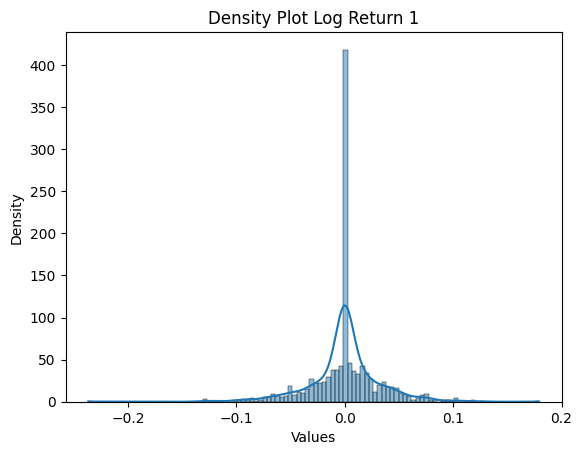

In [14]:
plot_density(df_with_weekends['log_return_1'], title='Density Plot Log Return 1', xlabel='Values')

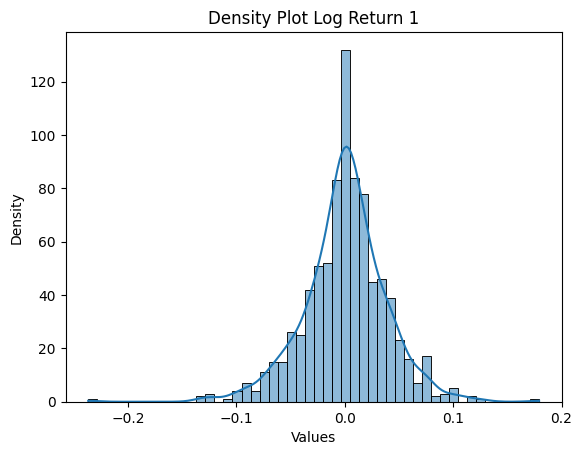

In [15]:
plot_density(df_without_weekends['log_return_1'], title='Density Plot Log Return 1', xlabel='Values')

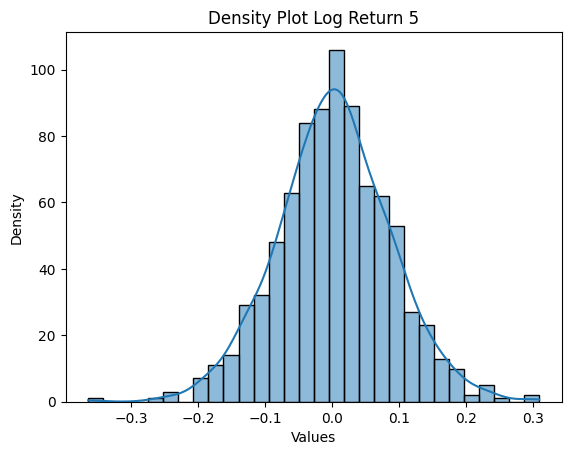

In [16]:
plot_density(df_without_weekends['log_return_5'], title='Density Plot Log Return 5', xlabel='Values')

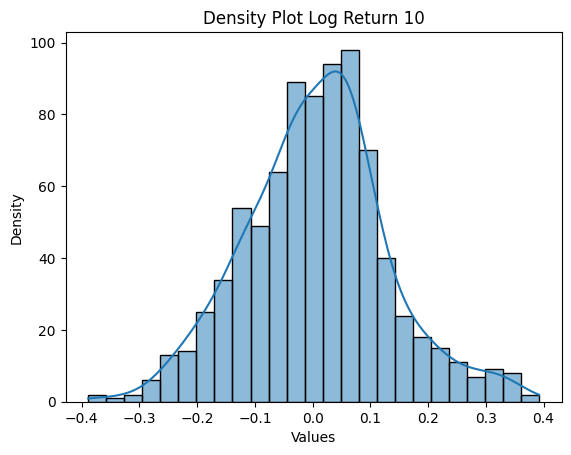

In [17]:
plot_density(df_without_weekends['log_return_10'], title='Density Plot Log Return 10', xlabel='Values')

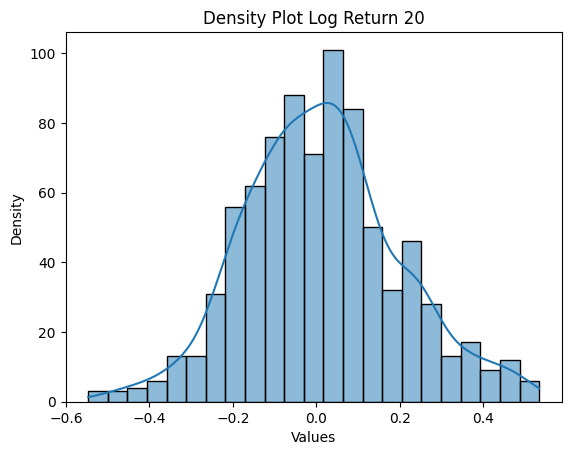

In [18]:
plot_density(df_without_weekends['log_return_20'], title='Density Plot Log Return 20', xlabel='Values')